<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ... JobSatPoints_6  \
0                                                NaN  ...            NaN   
1  Technical documentation;Blogs;Books;Written Tu...  ...            0.0   
2  Technical documentation;Blogs;Books;Written Tu...  ...            NaN   
3  Stack Overflow;How-to videos;Interactive tutorial  ...            NaN   
4  Technical documentation;Blogs;Written Tutorial...  ...            NaN   

  JobSatPoints_7 JobSatPoints_8 JobSatPoints_9 JobSatPoints_10  \
0            NaN            NaN            NaN             NaN   
1            0.0            0.0            0.0             0.0   
2            NaN            NaN            NaN             NaN   
3            NaN            NaN            NaN             NaN   
4            NaN            NaN            NaN             NaN   

  JobSatPoints_11           SurveyLength SurveyEase ConvertedCompYearly JobSat  
0             NaN                    NaN        NaN                 NaN    NaN  
1             0.0                    NaN        NaN                 NaN    NaN  
2             NaN  Appropriate in length       Easy                 NaN    NaN  
3             NaN               Too long       Easy                 NaN    NaN  
4             NaN              Too short       Easy                 NaN    NaN  

[5 rows x 114 columns]

<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


In [3]:
# Step 1: Count respondents per industry
industry_counts = df['Industry'].value_counts()

# Step 2: Plot a bar chart
plt.figure(figsize=(12, 6))
industry_counts.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Distribution of Respondents by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [4]:
# Step 1: Compute basic statistics
mean_comp = df['ConvertedCompYearly'].mean()
median_comp = df['ConvertedCompYearly'].median()
std_comp = df['ConvertedCompYearly'].std()

# Step 2: Define the threshold for outliers (3 standard deviations above the mean)
threshold = mean_comp + (3 * std_comp)

# Step 3: Identify respondents with extremely high compensation
high_earners = df[df['ConvertedCompYearly'] > threshold]

# Display results
print(f"Mean: {mean_comp:.2f}")
print(f"Median: {median_comp:.2f}")
print(f"Standard Deviation: {std_comp:.2f}")
print(f"Outlier Threshold: {threshold:.2f}")
print(f"Number of respondents with extreme compensation: {high_earners.shape[0]}")

# Show the top extreme earners
high_earners[['Country', 'Employment','Industry', 'ConvertedCompYearly']].sort_values(by='ConvertedCompYearly', ascending=False).head(10)

Mean: 86155.29
Median: 65000.00
Standard Deviation: 186756.97
Outlier Threshold: 646426.21
Number of respondents with extreme compensation: 89


Country                                         Employment  \
15837      Ethiopia  Independent contractor, freelancer, or self-em...   
12723  South Africa  Employed, full-time;Independent contractor, fr...   
28379        Taiwan                                Employed, full-time   
17593        Brazil                                Employed, full-time   
17672       Ukraine                                Employed, full-time   
19267         India                                Employed, full-time   
23694      Pakistan  Employed, full-time;Independent contractor, fr...   
33720        Brazil  Independent contractor, freelancer, or self-em...   
34523      Pakistan                                Employed, full-time   
13763     Australia                                Employed, full-time   

                                   Industry  ConvertedCompYearly  
15837                                   NaN           16256603.0  
12723          Media & Advertising Services           13818022.0  
28379  Computer Systems Design and Services            9000000.0  
17593                  Software Development            6340564.0  
17672                  Software Development            4936778.0  
19267                                Other:            3367716.0  
23694                                   NaN            2584118.0  
33720                                   NaN            2237846.0  
34523                  Software Development            2153432.0  
13763          Media & Advertising Services            2048046.0

<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Q1 (25th percentile): 32712.00
Q3 (75th percentile): 107971.50
IQR: 75259.50
Lower Bound: -80177.25
Upper Bound: 220860.75
Number of Outliers: 978


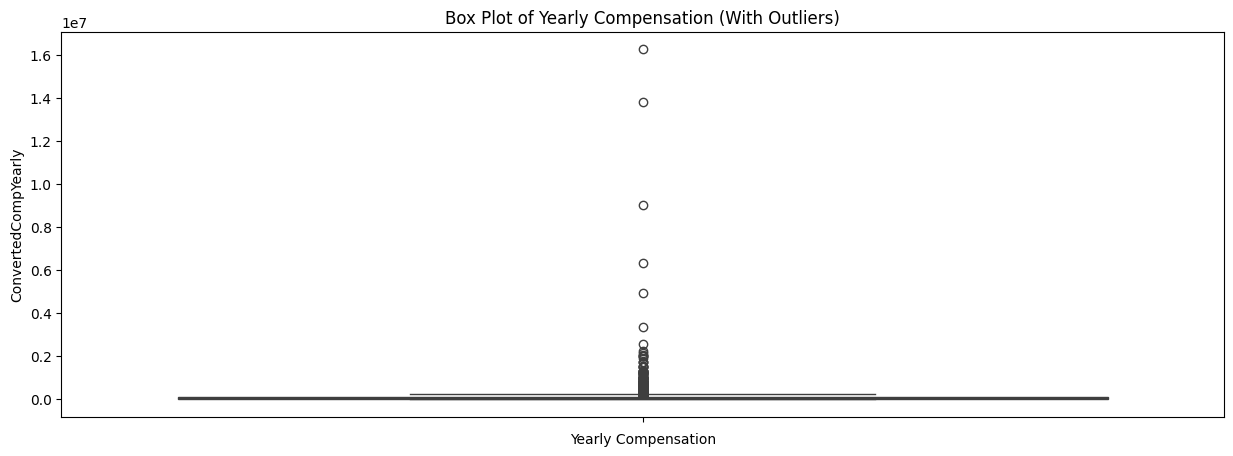

In [5]:

# Step 1: Compute Q1, Q3, and IQR
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Calculate upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Identify outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

# Print statistics
print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")
print(f"Number of Outliers: {outliers.shape[0]}")

# Step 4: Box Plot Visualization
plt.figure(figsize=(15, 5))
sns.boxplot(y=df['ConvertedCompYearly'])
plt.title("Box Plot of Yearly Compensation (With Outliers)")
plt.xlabel("Yearly Compensation")
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [6]:
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]
print("Original DataFrame size:", df.shape)
print("New DataFrame size (without outliers):", df_no_outliers.shape)


Original DataFrame size: (65437, 114)
New DataFrame size (without outliers): (22457, 114)


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [10]:
import numpy as np

# Define age mapping
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old ': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': np.nan  # Assign NaN initially
}

# Map age categories to numeric values
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Calculate the mean age (excluding NaN)
mean_age = df['AgeNumeric'].mean()

# Replace NaN (from "Prefer not to say") with the calculated mean
df['AgeNumeric'].fillna(mean_age, inplace=True)


# Select only numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_cols.corr()

df.head()

/tmp/ipykernel_814/3578007638.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AgeNumeric'].fillna(mean_age, inplace=True)


ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ... JobSatPoints_7  \
0                                                NaN  ...            NaN   
1  Technical documentation;Blogs;Books;Written Tu...  ...            0.0   
2  Technical documentation;Blogs;Books;Written Tu...  ...            NaN   
3  Stack Overflow;How-to videos;Interactive tutorial  ...            NaN   
4  Technical documentation;Blogs;Written Tutorial...  ...            NaN   

  JobSatPoints_8 JobSatPoints_9 JobSatPoints_10 JobSatPoints_11  \
0            NaN            NaN             NaN             NaN   
1            0.0            0.0             0.0             0.0   
2            NaN            NaN             NaN             NaN   
3            NaN            NaN             NaN             NaN   
4            NaN            NaN             NaN             NaN   

            SurveyLength SurveyEase ConvertedCompYearly JobSat AgeNumeric  
0                    NaN        NaN                 NaN    NaN  16.000000  
1                    NaN        NaN                 NaN    NaN  39.000000  
2  Appropriate in length       Easy                 NaN    NaN  49.000000  
3               Too long       Easy                 NaN    NaN  35.858851  
4              Too short       Easy                 NaN    NaN  35.858851  

[5 rows x 115 columns]

In [11]:
df['AgeNumeric'].value_counts(dropna = False)

AgeNumeric
29.000000    23911
39.000000    14942
35.858851    14420
49.000000     6249
59.000000     2575
16.000000     2568
70.000000      772
Name: count, dtype: int64

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
